In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Airlines+Data.xlsx', index_col=0, parse_dates=['Month'])
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [4]:
data.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [5]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


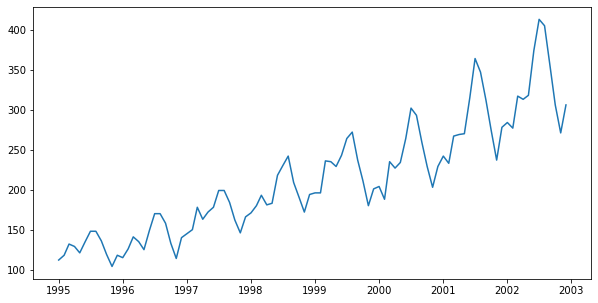

In [6]:
plt.figure(figsize=(10,5))
plt.plot(data)

<AxesSubplot:ylabel='Density'>

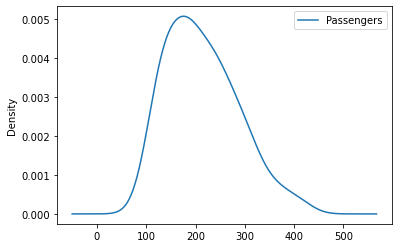

In [7]:
data.plot(kind='kde')

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

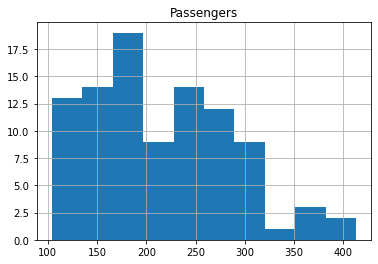

In [8]:
data.hist()

In [9]:
data = pd.read_excel("Airlines+Data.xlsx", index_col = 0, header = 0, parse_dates = True, squeeze=True)
data

Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [10]:
type(data)

pandas.core.series.Series

In [11]:
groups = data.groupby(pd.Grouper(freq='A'))

In [12]:
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values

In [13]:
years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<AxesSubplot:>

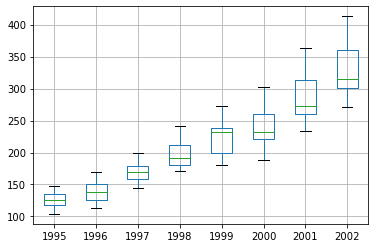

In [14]:
years.boxplot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

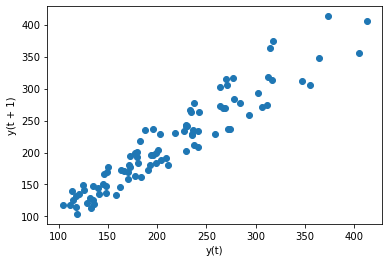

In [15]:
pd.plotting.lag_plot(data)

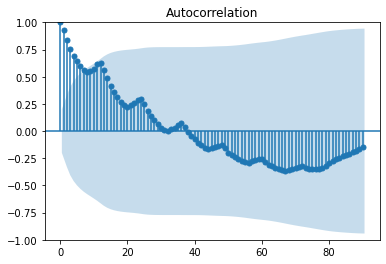

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data, lags=90)
plt.show()

In [17]:
data.shape

(96,)

In [18]:
unsample = data.resample('D').mean()
unsample

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
              ...  
2002-11-27      NaN
2002-11-28      NaN
2002-11-29      NaN
2002-11-30      NaN
2002-12-01    306.0
Freq: D, Name: Passengers, Length: 2892, dtype: float64

In [19]:
unsample.shape

(2892,)

In [20]:
interpolate = unsample.interpolate(method='linear')
interpolate

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
                 ...    
2002-11-27    301.333333
2002-11-28    302.500000
2002-11-29    303.666667
2002-11-30    304.833333
2002-12-01    306.000000
Freq: D, Name: Passengers, Length: 2892, dtype: float64

<AxesSubplot:xlabel='Month'>

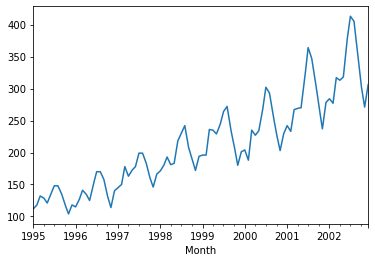

In [21]:
interpolate.plot()

In [22]:
#downsample to quarterly intervals
resample = data.resample('Q')
quarterly_mean = resample.mean()

<AxesSubplot:xlabel='Month'>

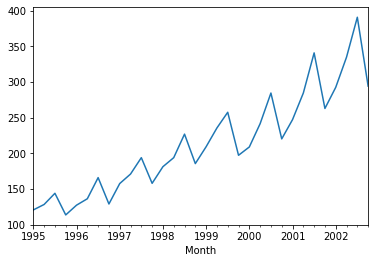

In [23]:
quarterly_mean.plot()

In [24]:
data = pd.read_excel("Airlines+Data.xlsx",index_col=0,header=0, parse_dates=True)
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


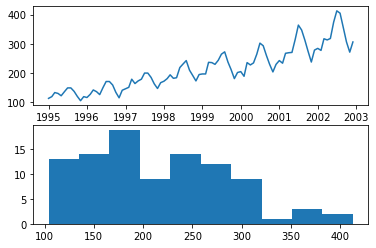

In [25]:
plt.subplot(211)
plt.plot(data)

plt.subplot(212)
plt.hist(data)

plt.show()

In [26]:
df = pd.DataFrame(np.log(data.values), columns = ['Passengers'])
df

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


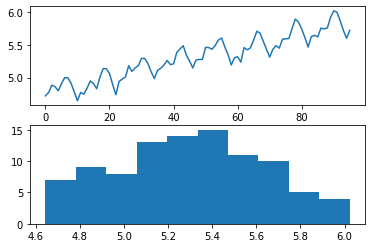

In [27]:
plt.subplot(211)
plt.plot(df['Passengers'])

plt.subplot(212)
plt.hist(df['Passengers'])
plt.show()

In [28]:
quarterly_mean

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
1996-06-30    136.333333
1996-09-30    166.000000
1996-12-31    129.000000
1997-03-31    157.666667
1997-06-30    171.000000
1997-09-30    194.000000
1997-12-31    158.000000
1998-03-31    181.333333
1998-06-30    194.000000
1998-09-30    227.000000
1998-12-31    185.666667
1999-03-31    209.333333
1999-06-30    235.666667
1999-09-30    257.666667
1999-12-31    197.333333
2000-03-31    209.000000
2000-06-30    241.666667
2000-09-30    284.666667
2000-12-31    220.333333
2001-03-31    247.333333
2001-06-30    284.666667
2001-09-30    341.000000
2001-12-31    263.000000
2002-03-31    292.666667
2002-06-30    335.000000
2002-09-30    391.000000
2002-12-31    294.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

In [29]:
df_sq = pd.DataFrame(np.sqrt(data.values), columns = ['Passengers'])
df_sq

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


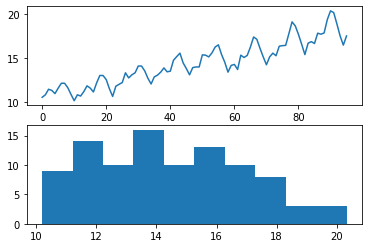

In [30]:
plt.subplot(211)
plt.plot(df_sq['Passengers'])

plt.subplot(212)
plt.hist(df_sq['Passengers'])
plt.show()

## Forecasting

In [31]:
data = pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [32]:
data['month'] = data['Month'].dt.strftime('%b')
data['year'] = data['Month'].dt.strftime('%Y')
data

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [33]:
data1 = pd.pivot_table(data = data, values='Passengers', index='year', columns='month', aggfunc='mean', fill_value=0)
data1

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='year'>

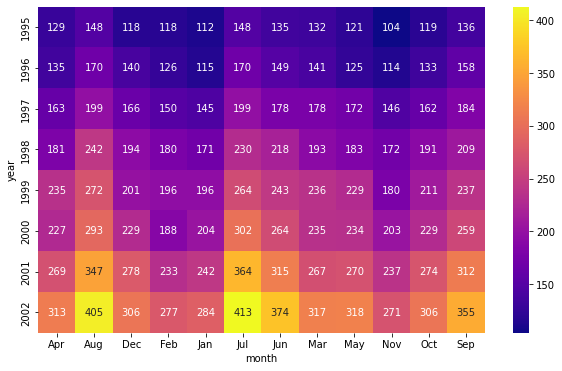

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(data1, annot=True, fmt='g', cmap='plasma')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

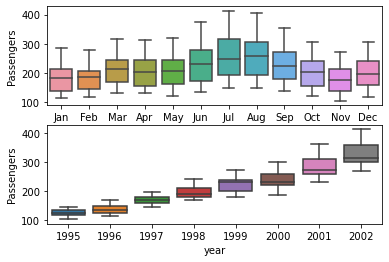

In [35]:
plt.subplot(211)
sns.boxplot(x='month', y='Passengers', data=data)

plt.subplot(212)
sns.boxplot(x='year', y='Passengers', data=data)

In [36]:
data

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [37]:
data['t'] = np.arange(1, 97)
data['t_square'] = np.square(data.t)
data['log_Passengers'] = np.log(data.Passengers)
data2 = pd.get_dummies(data['month'])

In [38]:
data

,Month,Passengers,month,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [39]:
data2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
data = pd.concat([data, data2], axis=1)
data

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
train_data = data.head(82)
test_data = data.tail(14)

In [42]:
train_data

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2001-06-01,315,Jun,2001,78,6084,5.752573,0,0,0,0,0,0,1,0,0,0,0,0
78,2001-07-01,364,Jul,2001,79,6241,5.897154,0,0,0,0,0,1,0,0,0,0,0,0
79,2001-08-01,347,Aug,2001,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
test_data

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
82,2001-11-01,237,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0
83,2001-12-01,278,Dec,2001,84,7056,5.627621,0,0,1,0,0,0,0,0,0,0,0,0
84,2002-01-01,284,Jan,2002,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,2002,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,2002,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,Jul,2002,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0


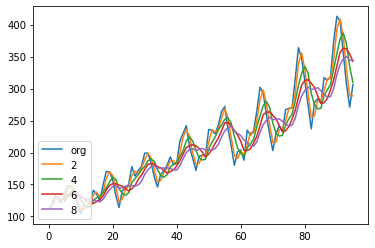

In [44]:
data.Passengers.plot(label='org')
for i in range(2, 10, 2):
    data['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [45]:
import statsmodels.formula.api as smf


In [46]:
linear_model = smf.ols('Passengers~t', data=train_data).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_linear))**2))
rmse_linear

49.699655200018114

In [47]:
#Exponential
Exp_model = smf.ols('log_Passengers~t',data=train_data).fit()
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(test_data['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.1006310664371

In [48]:
#Quadratic 
Quad_model = smf.ols('Passengers~t+t_square',data=train_data).fit()
pred_Quad = pd.Series(Quad_model.predict(test_data[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

45.969011379581694

In [49]:
#Additive seasonality 
add_sea_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.76282062960817

In [50]:
#Additive Seasonality Quadratic 
add_sea_Quad_model = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

24.132674895623943

In [51]:
##Multiplicative Seasonality
Mul_sea_model = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea_model.predict(test_data))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

136.36757602244185

In [52]:
#Multiplicative Additive Seasonality 
Mul_Add_sea_model = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea_model.predict(test_data))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.876834921441151

In [53]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad_model = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad_model.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

316.35517137288116

In [54]:
data = {"Model":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,Model,RMSE_Values
6,rmse_Mult_add_sea,9.876835
4,rmse_add_sea_quad,24.132675
2,rmse_Quad,45.969011
1,rmse_Exp,46.100631
0,rmse_linear,49.699655
3,rmse_add_sea,129.762821
5,rmse_Mult_sea,136.367576


In [55]:
data = pd.read_excel('Airlines+Data.xlsx')

In [56]:
train_data = data.head(82)
test_data = data.tail(14)

In [57]:
train_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
77,2001-06-01,315
78,2001-07-01,364
79,2001-08-01,347
80,2001-09-01,312


In [58]:
test_data

,Month,Passengers
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405


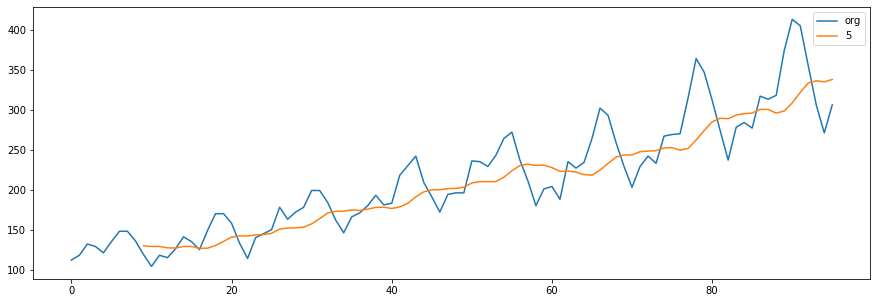

In [59]:
plt.figure(figsize=(15,5))
data['Passengers'].plot(label='org')
data['Passengers'].rolling(10).mean().plot(label=str(5))
plt.legend(loc='best')

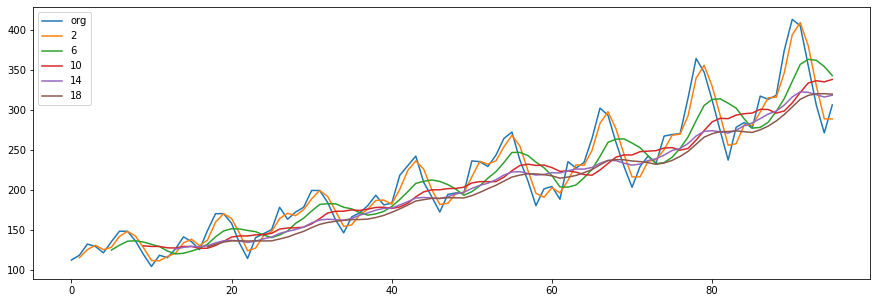

In [60]:
plt.figure(figsize=(15, 5))
data['Passengers'].plot(label = 'org')
for i in range(2, 20, 4):
    data['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

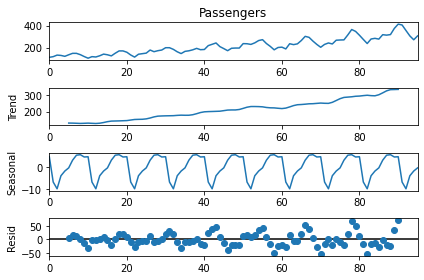

In [61]:
ts_decompose = seasonal_decompose(data['Passengers'], period = 10)
ts_decompose.plot()
plt.show()

In [62]:
import statsmodels.graphics.tsaplots as tsa_plots

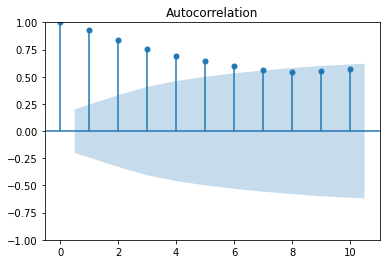

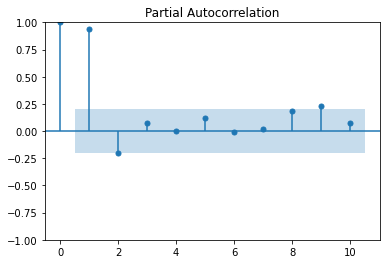

In [63]:
tsa_plots.plot_acf(data.Passengers, lags=10)
tsa_plots.plot_pacf(data.Passengers, lags=10)
plt.show()

In [64]:
def mape(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [65]:
ses_model = SimpleExpSmoothing(train_data["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
mape(pred_ses,test_data.Passengers)

12.187436123357363

In [66]:
# Holt method 
holt_model = Holt(train_data["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = test_data.index[0],end = test_data.index[-1])
mape(pred_holt,test_data.Passengers) 

18.56785389077183

In [67]:
hwe_model_add_add = ExponentialSmoothing(train_data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test_data.index[0],end = test_data.index[-1])
mape(pred_hwe_add_add,test_data.Passengers) 

5.789091216831014

In [68]:
hwe_model_mul_add = ExponentialSmoothing(data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [69]:
hwe_model_mul_add.forecast(12)

96     312.900533
97     308.172851
98     355.534843
99     345.772161
100    345.698761
101    392.473944
102    436.505077
103    429.863114
104    380.176787
105    332.321235
106    290.629755
107    330.595524
dtype: float64